# Sunspots Prediction:
Sunspots are the black spots which are found on the sun on every 11-22 years span and they are the result of immense heat that gets trapped within the sun due to extremely high magnetic field and the magnetic field is so strong that it is not allowing the sun's radiations to come out and thus the trapped heat results in the black spots which appear on the sun's surface and are thus called Sunspots.

### Importing the relevant libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
data = pd.read_csv('Sunspots.csv')
data.head()

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7


In [3]:
df = data['Monthly Mean Total Sunspot Number']
df

0        96.7
1       104.3
2       116.7
3        92.8
4       141.7
        ...  
3247      0.5
3248      1.1
3249      0.4
3250      0.5
3251      1.6
Name: Monthly Mean Total Sunspot Number, Length: 3252, dtype: float64

### Standardizing the inputs:

In [4]:
from sklearn.preprocessing import StandardScaler #we are scaling the data values

In [5]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(np.array(df).reshape(-1,1))
df_scaled

array([[ 0.21559879],
       [ 0.32760348],
       [ 0.51034797],
       ...,
       [-1.20361854],
       [-1.2021448 ],
       [-1.18593359]])

In [6]:
scaler.inverse_transform(df_scaled) #later in we would convert the scaled values back to original valus

array([[ 96.7],
       [104.3],
       [116.7],
       ...,
       [  0.4],
       [  0.5],
       [  1.6]])

In [7]:
df_scaled

array([[ 0.21559879],
       [ 0.32760348],
       [ 0.51034797],
       ...,
       [-1.20361854],
       [-1.2021448 ],
       [-1.18593359]])

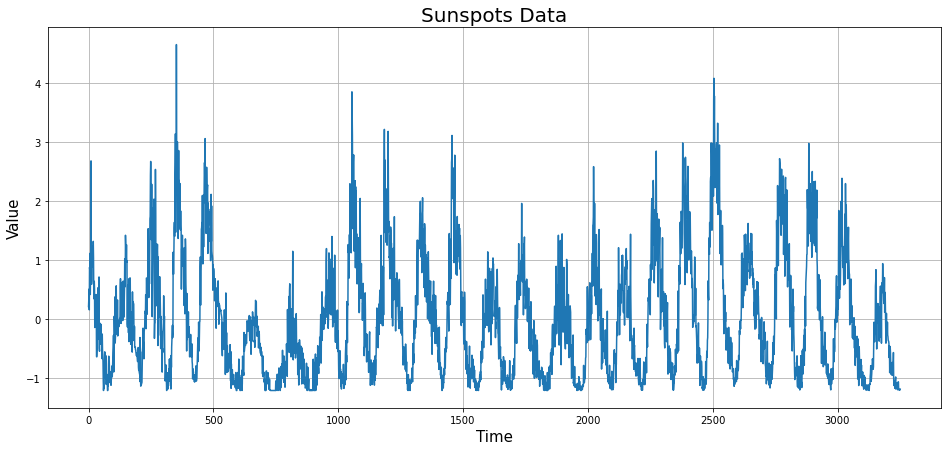

In [8]:
plt.figure(figsize=(16,7))
plt.plot(df_scaled)
plt.grid()
plt.xlabel('Time',fontsize=15)
plt.ylabel('Value',fontsize=15)
plt.title('Sunspots Data',fontsize=20)
plt.savefig('Sunspots DataSet Plot')

### Creating the datasets ready for training:

In [9]:
df_default = np.arange(10).reshape(-1,1) #for understandiing purpose

In [10]:
list1 = np.arange(10) # for understanding only
list1

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
x_train_df = df_scaled[:2700,:]
x_valid_df = df_scaled[2700:3000,:]
x_test_df = df_scaled[3000:,:]

In [12]:
def create_dataset(dataset , time_steps):#preprocessing function
    x = []
    y = []
    for time in range(len(dataset)-time_steps):
        x.append(dataset[time:time_steps+time ,:])
        y.append(dataset[time+time_steps])
    return np.array(x),np.array(y)

In [13]:
#Now I want to create a function which creates the label in such a manner that at each step , it will contain the next 5 values.
def inputs(dataset,time_steps):
    x=[]
    for time in range(len(dataset)-time_steps):
        x.append(dataset[time:time+time_steps,:])
    return np.array(x)

x = inputs(df_default,time_steps=6)
n_steps = 4
y = np.empty((4,n_steps,2)) #[4,4,2]
for ahead in range(1,2+1):
    y[: , : , ahead-1] = x[: , ahead:ahead+n_steps ,0]

In [13]:
x  = inputs(df_default,time_steps=4+2) #where for label time step value needs to be 4
x.shape , x

NameError: name 'inputs' is not defined

In [17]:
y.shape , y

((4, 4, 2),
 array([[[1., 2.],
         [2., 3.],
         [3., 4.],
         [4., 5.]],
 
        [[2., 3.],
         [3., 4.],
         [4., 5.],
         [5., 6.]],
 
        [[3., 4.],
         [4., 5.],
         [5., 6.],
         [6., 7.]],
 
        [[4., 5.],
         [5., 6.],
         [6., 7.],
         [7., 8.]]]))

In [13]:
# lesser the time steps , more is the batch size and in order to smoothen the learning curves , we can increase the batch size.
x_train , y_train = create_dataset(x_train_df , time_steps=100)
x_valid , y_valid = create_dataset(x_valid_df , time_steps=100)
x_test , y_test = create_dataset(x_test_df , time_steps=100)

In [14]:
x_train.shape , x_valid.shape , x_test.shape

((2600, 100, 1), (200, 100, 1), (152, 100, 1))

### Baseline Model of DNN's :

In [122]:
model_baseline = keras.models.Sequential([
    keras.layers.Dense(50 , activation='relu' , kernel_initializer='he_normal' , input_shape=[100,1]), #In input_shape,number of batches are taken None 
    keras.layers.Dense(50 , activation='relu' , kernel_initializer='he_normal'),
    keras.layers.Dense(1)
])

lr_scheduler = keras.callbacks.LearningRateScheduler(lambda epochs: 1e-8 * 10**(epochs/20))
model_baseline.compile(loss='mse',
                      optimizer=keras.optimizers.Adam(lr=1e-8),
                        metrics=['mae'])

history = model_baseline.fit(x_train,y_train,epochs=200,
                            validation_data=(x_valid,y_valid),
                            callbacks=[lr_scheduler])

Epoch 1/200
82/82 [==============================] - 1s 9ms/step - loss: 3.2938 - mae: 1.4313 - val_loss: 4.0533 - val_mae: 1.6555
Epoch 2/200
82/82 [==============================] - 1s 6ms/step - loss: 3.2935 - mae: 1.4312 - val_loss: 4.0529 - val_mae: 1.6555
Epoch 3/200
82/82 [==============================] - 0s 6ms/step - loss: 3.2932 - mae: 1.4311 - val_loss: 4.0525 - val_mae: 1.6554
Epoch 4/200
82/82 [==============================] - 1s 7ms/step - loss: 3.2928 - mae: 1.4310 - val_loss: 4.0521 - val_mae: 1.6552
Epoch 5/200
82/82 [==============================] - 1s 6ms/step - loss: 3.2923 - mae: 1.4309 - val_loss: 4.0514 - val_mae: 1.6551
Epoch 6/200
82/82 [==============================] - 1s 7ms/step - loss: 3.2918 - mae: 1.4308 - val_loss: 4.0507 - val_mae: 1.6549
Epoch 7/200
82/82 [==============================] - 1s 7ms/step - loss: 3.2911 - mae: 1.4306 - val_loss: 4.0499 - val_mae: 1.6547
Epoch 8/200
82/82 [==============================] - 1s 8ms/step - loss: 3.2904 - m

82/82 [==============================] - 1s 6ms/step - loss: 0.9865 - mae: 0.7969 - val_loss: 1.1402 - val_mae: 0.9085
Epoch 125/200
82/82 [==============================] - 0s 6ms/step - loss: 0.9874 - mae: 0.7999 - val_loss: 1.1245 - val_mae: 0.8998
Epoch 126/200
82/82 [==============================] - 0s 6ms/step - loss: 0.9860 - mae: 0.8001 - val_loss: 1.1366 - val_mae: 0.9066
Epoch 127/200
82/82 [==============================] - 0s 6ms/step - loss: 0.9874 - mae: 0.8012 - val_loss: 1.1203 - val_mae: 0.8944
Epoch 128/200
82/82 [==============================] - 0s 6ms/step - loss: 0.9889 - mae: 0.7992 - val_loss: 1.1152 - val_mae: 0.8864
Epoch 129/200
82/82 [==============================] - 0s 6ms/step - loss: 0.9895 - mae: 0.7996 - val_loss: 1.1058 - val_mae: 0.8914
Epoch 130/200
82/82 [==============================] - 0s 6ms/step - loss: 0.9897 - mae: 0.7997 - val_loss: 1.1057 - val_mae: 0.9021
Epoch 131/200
82/82 [==============================] - 0s 6ms/step - loss: 0.9902 -

Epoch 186/200
82/82 [==============================] - 1s 6ms/step - loss: 2.2216 - mae: 1.2049 - val_loss: 1.1354 - val_mae: 0.9327
Epoch 187/200
82/82 [==============================] - 0s 6ms/step - loss: 1.9193 - mae: 1.1113 - val_loss: 3.8896 - val_mae: 1.6683
Epoch 188/200
82/82 [==============================] - 1s 6ms/step - loss: 4.0807 - mae: 1.6783 - val_loss: 4.8686 - val_mae: 1.9750
Epoch 189/200
82/82 [==============================] - 0s 6ms/step - loss: 2.3829 - mae: 1.2515 - val_loss: 1.3077 - val_mae: 1.0189
Epoch 190/200
82/82 [==============================] - 1s 6ms/step - loss: 2.7666 - mae: 1.3045 - val_loss: 5.8693 - val_mae: 2.1824
Epoch 191/200
82/82 [==============================] - 0s 6ms/step - loss: 3.8299 - mae: 1.5313 - val_loss: 5.3691 - val_mae: 2.0857
Epoch 192/200
82/82 [==============================] - 1s 6ms/step - loss: 5.8230 - mae: 1.7777 - val_loss: 13.3406 - val_mae: 3.4977
Epoch 193/200
82/82 [==============================] - 0s 6ms/step -

In [74]:
def learning_curves(mse_loss , mse_val_loss , mae_loss , mae_val_loss , iters,x1,x2,y1,y2,start=0 , end=None):
    plt.subplot(121);
    epochs = np.arange(iters)
    plt.plot(epochs[start:end] , mse_loss[start:end] , 'b-o' , label='Training Curve')
    plt.plot(epochs[start:end] , mse_val_loss[start:end] , 'r-s' , label='Validation Curve')
    plt.grid()
    plt.legend()
    plt.xlabel('Epochs',fontsize=15)
    plt.ylabel('MSE',fontsize=15)
    plt.title('MSE Loss Curve',fontsize=20)
    plt.text(x1,y1,'MSE of Test Dataset = 0.0436',fontsize=12)
    
    plt.subplot(122);
    plt.plot(epochs[start:end] , mae_loss[start:end] , 'b-o' , label='Training Curve')
    plt.plot(epochs[start:end] , mae_val_loss[start:end] , 'r-s' , label='Validation Curve')
    plt.grid()
    plt.legend()
    plt.xlabel('Epochs',fontsize=15)
    plt.ylabel('MAE',fontsize=15)
    plt.title('MAE Loss Curves',fontsize=20)
    plt.text(x2,y2,'MSE of Test Dataset 0.1385',fontsize=12)

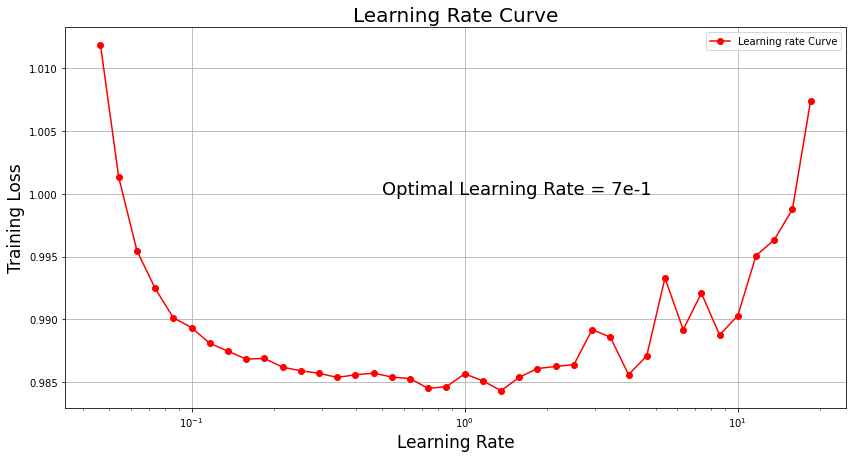

In [136]:
epochs = np.arange(200)
lrs = 1e-6 * 10**(epochs/15)
loss = history.history['loss']
plt.figure(figsize=(14,7))
plt.semilogx(lrs[70:110] , loss[70:110] , 'r-o',label='Learning rate Curve')
plt.grid()
#plt.text(1e-4 , 0.992 ,'Optimal Learning Rate-: 1.3*e-4',fontsize=17)
plt.title('Learning Rate Curve',fontsize=20)
plt.xlabel('Learning Rate',fontsize=17)
plt.ylabel('Training Loss',fontsize=17)
plt.text(5e-1,1,'Optimal Learning Rate = 7e-1',fontsize=18)
plt.legend()
plt.savefig('LR Curve of Baseline Model')

In [137]:
model_baseline = keras.models.Sequential([ 
    keras.layers.Dense(30 , activation='relu' , kernel_initializer='he_normal' , input_shape=[100,1]),  
    keras.layers.Dense(30 , activation='relu' , kernel_initializer='he_normal'),
    keras.layers.Dense(1)
])

model_baseline.compile(loss='mse',
                      optimizer=keras.optimizers.Adam(lr=7e-1),
                        metrics=['mae'])

history = model_baseline.fit(x_train,y_train,epochs=300,
                            validation_data=(x_valid,y_valid))

Epoch 1/300
82/82 [==============================] - 1s 9ms/step - loss: 73.5916 - mae: 2.2599 - val_loss: 1.2154 - val_mae: 0.9194
Epoch 2/300
82/82 [==============================] - 0s 6ms/step - loss: 1.0785 - mae: 0.8230 - val_loss: 1.1935 - val_mae: 0.9294
Epoch 3/300
82/82 [==============================] - 1s 7ms/step - loss: 1.0800 - mae: 0.8258 - val_loss: 1.1253 - val_mae: 0.8805
Epoch 4/300
82/82 [==============================] - 1s 9ms/step - loss: 1.0086 - mae: 0.8093 - val_loss: 1.1721 - val_mae: 0.8724
Epoch 5/300
82/82 [==============================] - 1s 8ms/step - loss: 1.0003 - mae: 0.8031 - val_loss: 1.1328 - val_mae: 0.8786
Epoch 6/300
82/82 [==============================] - 1s 9ms/step - loss: 1.0488 - mae: 0.8244 - val_loss: 1.2353 - val_mae: 0.8756
Epoch 7/300
82/82 [==============================] - 1s 6ms/step - loss: 1.0141 - mae: 0.8090 - val_loss: 1.1384 - val_mae: 0.8778
Epoch 8/300
82/82 [==============================] - 1s 6ms/step - loss: 1.0007 - 

Epoch 125/300
82/82 [==============================] - 0s 6ms/step - loss: 1.0392 - mae: 0.8191 - val_loss: 1.1168 - val_mae: 0.9156
Epoch 126/300
82/82 [==============================] - 0s 5ms/step - loss: 1.0181 - mae: 0.8110 - val_loss: 1.2092 - val_mae: 0.8731
Epoch 127/300
82/82 [==============================] - 0s 5ms/step - loss: 1.0437 - mae: 0.8168 - val_loss: 1.1066 - val_mae: 0.8953
Epoch 128/300
82/82 [==============================] - 0s 5ms/step - loss: 1.0386 - mae: 0.8169 - val_loss: 1.3599 - val_mae: 0.8852
Epoch 129/300
82/82 [==============================] - 0s 5ms/step - loss: 1.0230 - mae: 0.8168 - val_loss: 1.2444 - val_mae: 0.8753
Epoch 130/300
82/82 [==============================] - 0s 5ms/step - loss: 1.0229 - mae: 0.8096 - val_loss: 1.1159 - val_mae: 0.8838
Epoch 131/300
82/82 [==============================] - 0s 5ms/step - loss: 1.0316 - mae: 0.8185 - val_loss: 1.3015 - val_mae: 0.8799
Epoch 132/300
82/82 [==============================] - 0s 6ms/step - 

Epoch 248/300
82/82 [==============================] - 0s 6ms/step - loss: 1.0507 - mae: 0.8233 - val_loss: 1.1247 - val_mae: 0.9233
Epoch 249/300
82/82 [==============================] - 0s 5ms/step - loss: 1.0383 - mae: 0.8202 - val_loss: 1.1064 - val_mae: 0.8970
Epoch 250/300
82/82 [==============================] - 0s 5ms/step - loss: 1.0596 - mae: 0.8257 - val_loss: 1.2219 - val_mae: 0.8738
Epoch 251/300
82/82 [==============================] - 0s 5ms/step - loss: 1.0315 - mae: 0.8163 - val_loss: 1.1066 - val_mae: 0.8949
Epoch 252/300
82/82 [==============================] - 0s 5ms/step - loss: 1.0234 - mae: 0.8093 - val_loss: 1.1167 - val_mae: 0.9155
Epoch 253/300
82/82 [==============================] - 0s 6ms/step - loss: 1.0530 - mae: 0.8216 - val_loss: 1.3232 - val_mae: 1.0250
Epoch 254/300
82/82 [==============================] - 0s 5ms/step - loss: 1.0764 - mae: 0.8315 - val_loss: 1.1590 - val_mae: 0.8727
Epoch 255/300
82/82 [==============================] - 0s 6ms/step - 

In [141]:
model_baseline.evaluate(x_test,y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.4770 - mae: 0.6189


[0.47699135541915894, 0.6189016699790955]

### Observation:
<li>Learning rate scheduler is used to find the optimal learning rate for the model and then train the model on that learning rate and mae=0.713 , mse=0.6548</li>
<li>Go for either of the learning rates -> 7.2e-5 or 1.3e-4</li>
<li>Seems the model is overfitting with 30 neurons</li>
<li>Now trying with 20 neurons , mae=0.724 , mse=0.6801 and the error has increased in this case.</li>
<li>Now trying the same approach with 50 epochs , hence with the optimal learning rate found , mae=0.7245 and mse=0.6793</li>
<li>Trying with 50 epochs and Flatten layer in the starting to reduce down the features</li>

In [111]:
y_train.shape

(2600, 1)

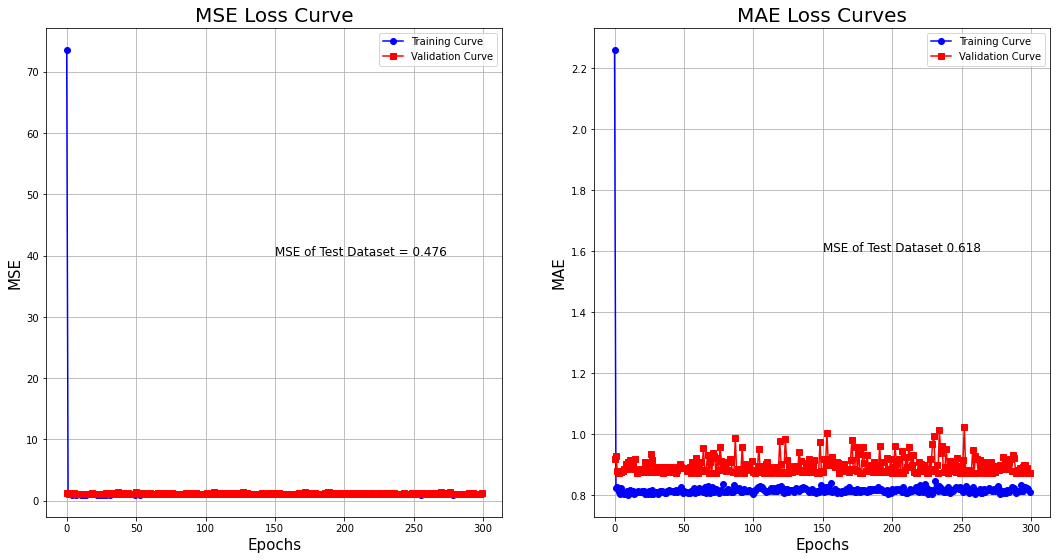

In [165]:
loss = history.history['loss']
val_loss = history.history['val_loss']
mae_loss = history.history['mae']
mae_val_loss = history.history['val_mae']

plt.figure(figsize=(18,9))
learning_curves(loss,val_loss,mae_loss,mae_val_loss,x1=150,y1=40,x2=150,y2=1.6,iters=300,start=0)
plt.savefig('LC of Baseline Model')

In [173]:
y_pred = model_baseline.predict(x_test)
y_pred[:,1].shape

(152, 1)

### LSTM Model :

In [64]:
model = keras.models.Sequential([
    keras.layers.Conv1D(filters=30 , kernel_size=4 , strides=2 , padding='valid' ,input_shape=[None,1]),
    keras.layers.LSTM(30,return_sequences=True),
    keras.layers.LSTM(30,return_sequences=True),
    keras.layers.LSTM(30),
    keras.layers.Dense(30),
    keras.layers.Dense(1)
])

lr_schedule = keras.callbacks.LearningRateScheduler(lambda epoch: 1e-6 * 10**(epoch/10))
model.compile(loss='mse',
             optimizer=keras.optimizers.Adam(lr=1e-6),
             metrics=['mae'])

history = model.fit(x_train,y_train,epochs=100,
                   validation_data=(x_valid,y_valid),
                   callbacks = [lr_schedule])

Epoch 1/100
82/82 [==============================] - 10s 119ms/step - loss: 1.0323 - mae: 0.8201 - val_loss: 1.1311 - val_mae: 0.8931
Epoch 2/100
82/82 [==============================] - 8s 93ms/step - loss: 1.0271 - mae: 0.8178 - val_loss: 1.1256 - val_mae: 0.8908
Epoch 3/100
82/82 [==============================] - 8s 95ms/step - loss: 1.0207 - mae: 0.8147 - val_loss: 1.1188 - val_mae: 0.8879
Epoch 4/100
82/82 [==============================] - 7s 91ms/step - loss: 1.0128 - mae: 0.8111 - val_loss: 1.1102 - val_mae: 0.8842
Epoch 5/100
82/82 [==============================] - 8s 92ms/step - loss: 1.0031 - mae: 0.8066 - val_loss: 1.0999 - val_mae: 0.8797
Epoch 6/100
82/82 [==============================] - 7s 87ms/step - loss: 0.9912 - mae: 0.8009 - val_loss: 1.0871 - val_mae: 0.8740
Epoch 7/100
82/82 [==============================] - 7s 90ms/step - loss: 0.9763 - mae: 0.7940 - val_loss: 1.0711 - val_mae: 0.8671
Epoch 8/100
82/82 [==============================] - 7s 89ms/step - loss: 

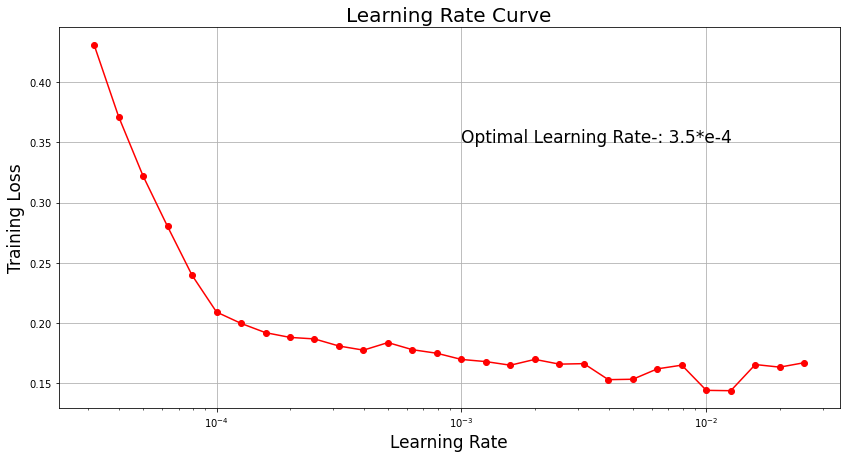

In [70]:
epochs = np.arange(100)
lrs = 1e-6 * 10**(epochs/10)
loss = history.history['loss']
plt.figure(figsize=(14,7))
plt.semilogx(lrs[15:45],loss[15:45],'r-o')
plt.grid()
plt.text(1e-3 , 0.35 ,'Optimal Learning Rate-: 3.5*e-4',fontsize=17)
plt.title('Learning Rate Curve',fontsize=20)
plt.xlabel('Learning Rate',fontsize=17)
plt.ylabel('Training Loss',fontsize=17)
plt.savefig('LR Curve of 1st LSTM Model')
#So after looking closely at various epochs , we can certainly say that the optimal learning rate is 3 * 1e-4

In [71]:
model = keras.models.Sequential([
    keras.layers.Conv1D(filters=30 , kernel_size=4 , strides=2 , padding='valid' ,input_shape=[None,1]),
    keras.layers.LSTM(30,return_sequences=True),
    keras.layers.LSTM(30,return_sequences=True),
    keras.layers.LSTM(30),
    keras.layers.Dense(30),
    keras.layers.Dense(1)
])

model.compile(loss='mse',
             optimizer=keras.optimizers.Adam(lr=3.5e-4),
             metrics=['mae'])

history = model.fit(x_train,y_train,epochs=100,
                   validation_data=(x_valid,y_valid))

Epoch 1/100
82/82 [==============================] - 9s 113ms/step - loss: 0.5449 - mae: 0.5651 - val_loss: 0.2374 - val_mae: 0.3483
Epoch 2/100
82/82 [==============================] - 7s 89ms/step - loss: 0.2236 - mae: 0.3566 - val_loss: 0.1672 - val_mae: 0.3097
Epoch 3/100
82/82 [==============================] - 8s 92ms/step - loss: 0.1905 - mae: 0.3274 - val_loss: 0.1584 - val_mae: 0.2920
Epoch 4/100
82/82 [==============================] - 7s 87ms/step - loss: 0.1812 - mae: 0.3201 - val_loss: 0.1484 - val_mae: 0.2833
Epoch 5/100
82/82 [==============================] - 7s 86ms/step - loss: 0.1738 - mae: 0.3120 - val_loss: 0.1581 - val_mae: 0.3020
Epoch 6/100
82/82 [==============================] - 7s 85ms/step - loss: 0.1702 - mae: 0.3066 - val_loss: 0.1471 - val_mae: 0.2823
Epoch 7/100
82/82 [==============================] - 7s 91ms/step - loss: 0.1681 - mae: 0.3058 - val_loss: 0.1544 - val_mae: 0.2921
Epoch 8/100
82/82 [==============================] - 7s 88ms/step - loss: 0

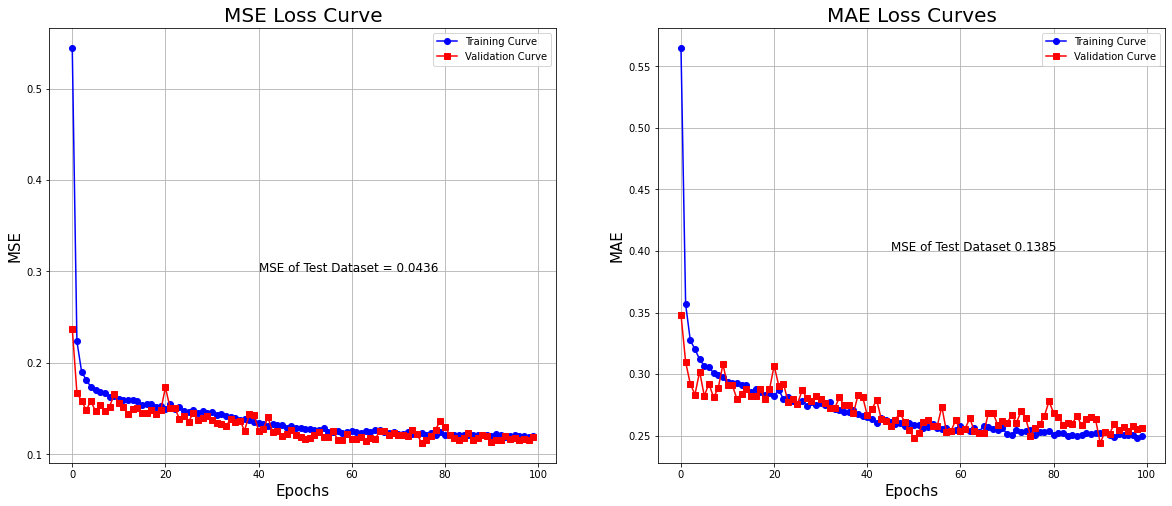

In [75]:
loss = history.history['loss']
val_loss = history.history['val_loss']
mae_loss = history.history['mae']
mae_val_loss = history.history['val_mae']

plt.figure(figsize=(20,8))
learning_curves(loss,val_loss,mae_loss,mae_val_loss,iters=100,start=0,x1=40,y1=0.30,x2=45,y2=0.40)
plt.savefig('LC of 1st LSTM model')

In [76]:
model.evaluate(x_test,y_test)

5/5 [==============================] - 0s 20ms/step - loss: 0.0436 - mae: 0.1385


[0.04361293837428093, 0.1385074108839035]

### Observations:
#### It is advisable to use MS-Excel next time so that you can easily create a table and that would actually be more intuitive rather than mentioning it in such a way as done below.

<li>With time_steps=100 , optimizer='adam' and neurons=40 , mse=0.145 and mae=0.271 and the validation learning curve was also a bit zig-zig</li>
<li>With neurons=30 , mse=0.131 and mae=0.2629 and there is a bit less variation in the learning curves but since we are only training for 20 epochs , it would not have that much room for becoming very smooth.</li>
<li>Now in order to reduce the zig-zag manner of the validation data , I try to reduce the time_steps to 50 so that more number of batches can be formed and there has been a bit improvement in mae and mse , mse=0.1270 and mae=0.25527.</li>
<li>With 60 epochs , 'adam' as the optimizer , time_steps as 50 , Conv1d layer with 30 filters and kernel_size=4 , padding='valid' and strides=2 , mae = 0.2385 and mse=0.1081  </li>
<li>With the learning rate 3e-3 , the curves are not looking well but the error has reduced , mse=0.09 and mae=0.218 </li>
<li>Training the model , with optimizer='adam' , the model has really improved , mae=0.171 and mse=0.054 </li>
<li>Till now , we have been using the default learning rate of 0.01 but now we wanted to be more precise in our result and thus I decided to use the callback learning rate scheduler which updates the learning rate at each epoch and thus in order to find the correct learning rate , we would plot the training loss versus learning rate and would observe at which lr , the loss started to shoot back and that would be our optimal learning rate .After choosing the optimal learning rate , we would train the model again for some epochs and then look how much the model has improved.</li>
<li>The optimal learning rate found is 3e-4 and we train our model on this learning rate for 100 epochs and after observing the learning curves, the mae and mse is reduced to mae=0.1699 and mse=0.0520 </li>
<li>With the same learning rate and same model but with time_steps=100 , we can see that the learning curves are very close to each other almost overlapping with each other with further reduced mae and mse mse=0.04 and mae=0.1433.This is the best model so far.</li>
<li>Now going on with trying the learning rate again with the updated time_steps=100 , we found that the optimal learning rate for our model is 2.5e-4 since it is the lowest point after which the error curve is shooting back and then if we consider a learning rate higher than this one would not deal nicely with the test and the validation dataset and the model henceforth would not converege to the global optimum and thus would not be generalised well , hence I expect a better result than the previous one where I trained the model on 100 epochs but with the optimal learning rate that we found with the time_steps=50 i.e. 3.5e-4, so now our model should actually be working better and reduction in the mae and mse is expected. </li>
<li>The result is as expected with mse=0.04198 and mae=0.13584 , hence this is actually the best model till now and I would consider this model to be the perfect one for our purpose.</li>
<li>I tried with the learning rate = 1e-3 ,learning curves werent that good and they were not at all smooth and the validation error was increasing towards the end of the epochs. </li>

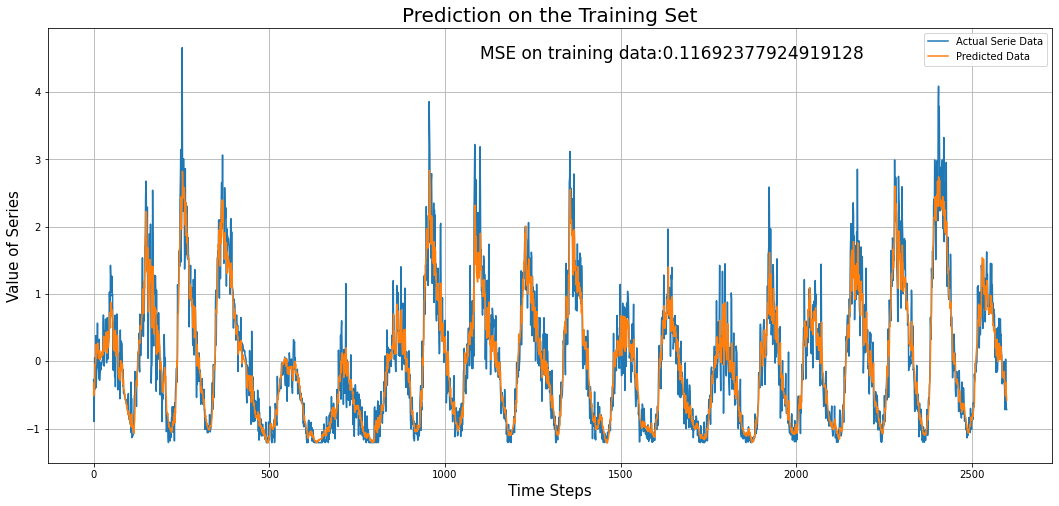

In [82]:
y_pred_train = model.predict(x_train)
plt.figure(figsize=(18,8))
plt.plot(y_train,label='Actual Serie Data')
plt.plot(y_pred_train,label='Predicted Data')
plt.grid()
plt.title('Prediction on the Training Set',fontsize=20)
plt.legend()
plt.text(1100,4.5,'MSE on training data:{}'.format(np.mean(keras.metrics.mean_squared_error(y_train,y_pred_train))),fontsize=17)
plt.xlabel('Time Steps',fontsize=15)
plt.ylabel('Value of Series',fontsize=15)
plt.savefig("1st LSTM MODEL's Performance on training dataset")

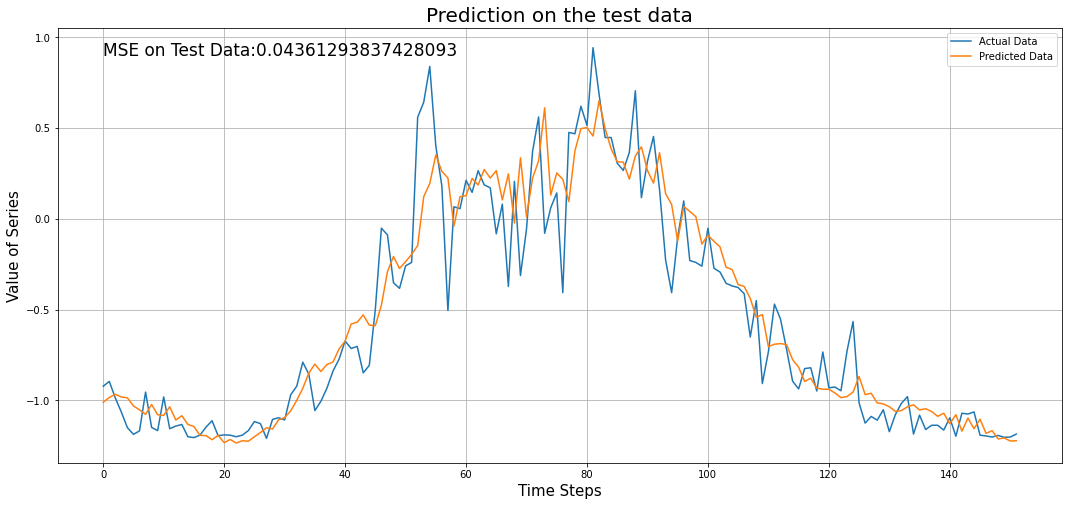

In [81]:
y_pred = model.predict(x_test)
plt.figure(figsize=(18,8))
plt.plot(y_test,label='Actual Data')
plt.plot(y_pred,label='Predicted Data')
plt.grid()
plt.legend()
plt.title('Prediction on the test data',fontsize=20)
plt.text(0,0.9,'MSE on Test Data:{}'.format(np.mean(keras.metrics.mean_squared_error(y_test,y_pred))),fontsize=17)
plt.xlabel('Time Steps',fontsize=15)
plt.ylabel('Value of Series',fontsize=15)
plt.savefig("1st LSTM MODEL's Performance on Test Data")

### Predictions:
Now in order to forecast the next day's number , I would actually need the last 100 datapoints since 100 is our time_step so that's why we need the last 100 datapoints from that of the test set and then would predict the data for the next whatsoever days you want(just have to create a while loop for those number of data).  

In [80]:
len(x_test_df) 

252

In [83]:
x_test_df.shape

(252, 1)

In [84]:
input_data = x_test_df[152:].reshape(1,100)
input_data.shape

(1, 100)

In [85]:
temp_input = input_data.tolist() #converting into list
temp_input = temp_input[0]
temp_input

[0.5604553358254378,
 0.6429851079858682,
 0.8404670627983262,
 0.40129077523032236,
 0.1817026314463206,
 -0.5050629726029742,
 0.06675044879429257,
 0.056434227274238954,
 0.21265129600648186,
 0.14633272909185038,
 0.26570614953818694,
 0.18759761517206547,
 0.17138640992626678,
 -0.08209789028076905,
 0.08148790810865511,
 -0.3724258387737112,
 0.20675631228073674,
 -0.31200225558482475,
 -0.05557046351491651,
 0.37181585660159727,
 0.5619290817568742,
 -0.0791503984178965,
 0.06085546506854768,
 0.14338523722897784,
 -0.40632199519674506,
 0.4764518177335715,
 0.4690830880763902,
 0.6208789190143243,
 0.514769211950914,
 0.943629277998864,
 0.6871974859289556,
 0.44845064503628257,
 0.44845064503628257,
 0.3069710356184022,
 0.2671798954696233,
 0.3659208728758524,
 0.7063561830376271,
 0.11685781046312531,
 0.31728725713845585,
 0.45434562876202766,
 0.16107018840621293,
 -0.22652499156152195,
 -0.40632199519674506,
 -0.09978284145800415,
 0.0991728592858902,
 -0.2294724834243945

In [86]:
lst_output = []
n_steps = 100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        print('Temp Input',temp_input)
        input_data = np.array(temp_input[1:]) #currently we have 101 elements in temp_output but the shape remains the same i.e. 100 only so we have excluded the first one
        print('{} day input {}'.format(i,input_data))
        input_data = input_data.reshape(-1,1)
        input_data = input_data.reshape((1,n_steps,1))
        print('Input_data :',input_data)
        y_hat = model.predict(input_data)
        print('{} day output {}'.format(i,y_hat))
        temp_input.extend(y_hat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(y_hat.tolist())
        i=i+1
        
        
    else:
        input_data = input_data.reshape((1,n_steps,1))
        y_hat = model.predict(input_data)
        print('Y_hat:',y_hat)
        temp_input.extend(y_hat[0].tolist())
        print('Length of temp_input:',len(temp_input))
        lst_output.extend(y_hat.tolist())
        i=i+1

print(lst_output)

Y_hat: [[-1.2142575]]
Length of temp_input: 101
Temp Input [0.5604553358254378, 0.6429851079858682, 0.8404670627983262, 0.40129077523032236, 0.1817026314463206, -0.5050629726029742, 0.06675044879429257, 0.056434227274238954, 0.21265129600648186, 0.14633272909185038, 0.26570614953818694, 0.18759761517206547, 0.17138640992626678, -0.08209789028076905, 0.08148790810865511, -0.3724258387737112, 0.20675631228073674, -0.31200225558482475, -0.05557046351491651, 0.37181585660159727, 0.5619290817568742, -0.0791503984178965, 0.06085546506854768, 0.14338523722897784, -0.40632199519674506, 0.4764518177335715, 0.4690830880763902, 0.6208789190143243, 0.514769211950914, 0.943629277998864, 0.6871974859289556, 0.44845064503628257, 0.44845064503628257, 0.3069710356184022, 0.2671798954696233, 0.3659208728758524, 0.7063561830376271, 0.11685781046312531, 0.31728725713845585, 0.45434562876202766, 0.16107018840621293, -0.22652499156152195, -0.40632199519674506, -0.09978284145800415, 0.0991728592858902, -0.22

2 day output [[-1.2078267]]
Temp Input [0.8404670627983262, 0.40129077523032236, 0.1817026314463206, -0.5050629726029742, 0.06675044879429257, 0.056434227274238954, 0.21265129600648186, 0.14633272909185038, 0.26570614953818694, 0.18759761517206547, 0.17138640992626678, -0.08209789028076905, 0.08148790810865511, -0.3724258387737112, 0.20675631228073674, -0.31200225558482475, -0.05557046351491651, 0.37181585660159727, 0.5619290817568742, -0.0791503984178965, 0.06085546506854768, 0.14338523722897784, -0.40632199519674506, 0.4764518177335715, 0.4690830880763902, 0.6208789190143243, 0.514769211950914, 0.943629277998864, 0.6871974859289556, 0.44845064503628257, 0.44845064503628257, 0.3069710356184022, 0.2671798954696233, 0.3659208728758524, 0.7063561830376271, 0.11685781046312531, 0.31728725713845585, 0.45434562876202766, 0.16107018840621293, -0.22652499156152195, -0.40632199519674506, -0.09978284145800415, 0.0991728592858902, -0.2294724834243945, -0.23978870494444832, -0.26042114798455573, 

4 day output [[-1.1843706]]
Temp Input [0.1817026314463206, -0.5050629726029742, 0.06675044879429257, 0.056434227274238954, 0.21265129600648186, 0.14633272909185038, 0.26570614953818694, 0.18759761517206547, 0.17138640992626678, -0.08209789028076905, 0.08148790810865511, -0.3724258387737112, 0.20675631228073674, -0.31200225558482475, -0.05557046351491651, 0.37181585660159727, 0.5619290817568742, -0.0791503984178965, 0.06085546506854768, 0.14338523722897784, -0.40632199519674506, 0.4764518177335715, 0.4690830880763902, 0.6208789190143243, 0.514769211950914, 0.943629277998864, 0.6871974859289556, 0.44845064503628257, 0.44845064503628257, 0.3069710356184022, 0.2671798954696233, 0.3659208728758524, 0.7063561830376271, 0.11685781046312531, 0.31728725713845585, 0.45434562876202766, 0.16107018840621293, -0.22652499156152195, -0.40632199519674506, -0.09978284145800415, 0.0991728592858902, -0.2294724834243945, -0.23978870494444832, -0.26042114798455573, -0.05114922572060779, -0.2722111154360458

6 day output [[-1.1459402]]
Temp Input [0.06675044879429257, 0.056434227274238954, 0.21265129600648186, 0.14633272909185038, 0.26570614953818694, 0.18759761517206547, 0.17138640992626678, -0.08209789028076905, 0.08148790810865511, -0.3724258387737112, 0.20675631228073674, -0.31200225558482475, -0.05557046351491651, 0.37181585660159727, 0.5619290817568742, -0.0791503984178965, 0.06085546506854768, 0.14338523722897784, -0.40632199519674506, 0.4764518177335715, 0.4690830880763902, 0.6208789190143243, 0.514769211950914, 0.943629277998864, 0.6871974859289556, 0.44845064503628257, 0.44845064503628257, 0.3069710356184022, 0.2671798954696233, 0.3659208728758524, 0.7063561830376271, 0.11685781046312531, 0.31728725713845585, 0.45434562876202766, 0.16107018840621293, -0.22652499156152195, -0.40632199519674506, -0.09978284145800415, 0.0991728592858902, -0.2294724834243945, -0.23978870494444832, -0.26042114798455573, -0.05114922572060779, -0.27221111543604587, -0.2928435584761534, -0.35474088759647

8 day output [[-1.0920776]]
Temp Input [0.21265129600648186, 0.14633272909185038, 0.26570614953818694, 0.18759761517206547, 0.17138640992626678, -0.08209789028076905, 0.08148790810865511, -0.3724258387737112, 0.20675631228073674, -0.31200225558482475, -0.05557046351491651, 0.37181585660159727, 0.5619290817568742, -0.0791503984178965, 0.06085546506854768, 0.14338523722897784, -0.40632199519674506, 0.4764518177335715, 0.4690830880763902, 0.6208789190143243, 0.514769211950914, 0.943629277998864, 0.6871974859289556, 0.44845064503628257, 0.44845064503628257, 0.3069710356184022, 0.2671798954696233, 0.3659208728758524, 0.7063561830376271, 0.11685781046312531, 0.31728725713845585, 0.45434562876202766, 0.16107018840621293, -0.22652499156152195, -0.40632199519674506, -0.09978284145800415, 0.0991728592858902, -0.2294724834243945, -0.23978870494444832, -0.26042114798455573, -0.05114922572060779, -0.27221111543604587, -0.2928435584761534, -0.35474088759647615, -0.3694783469108387, -0.37832082249945

10 day output [[-1.0206493]]
Temp Input [0.26570614953818694, 0.18759761517206547, 0.17138640992626678, -0.08209789028076905, 0.08148790810865511, -0.3724258387737112, 0.20675631228073674, -0.31200225558482475, -0.05557046351491651, 0.37181585660159727, 0.5619290817568742, -0.0791503984178965, 0.06085546506854768, 0.14338523722897784, -0.40632199519674506, 0.4764518177335715, 0.4690830880763902, 0.6208789190143243, 0.514769211950914, 0.943629277998864, 0.6871974859289556, 0.44845064503628257, 0.44845064503628257, 0.3069710356184022, 0.2671798954696233, 0.3659208728758524, 0.7063561830376271, 0.11685781046312531, 0.31728725713845585, 0.45434562876202766, 0.16107018840621293, -0.22652499156152195, -0.40632199519674506, -0.09978284145800415, 0.0991728592858902, -0.2294724834243945, -0.23978870494444832, -0.26042114798455573, -0.05114922572060779, -0.27221111543604587, -0.2928435584761534, -0.35474088759647615, -0.3694783469108387, -0.3783208224994562, -0.41221697892249004, -0.650963819815

12 day output [[-0.9286314]]
Temp Input [0.17138640992626678, -0.08209789028076905, 0.08148790810865511, -0.3724258387737112, 0.20675631228073674, -0.31200225558482475, -0.05557046351491651, 0.37181585660159727, 0.5619290817568742, -0.0791503984178965, 0.06085546506854768, 0.14338523722897784, -0.40632199519674506, 0.4764518177335715, 0.4690830880763902, 0.6208789190143243, 0.514769211950914, 0.943629277998864, 0.6871974859289556, 0.44845064503628257, 0.44845064503628257, 0.3069710356184022, 0.2671798954696233, 0.3659208728758524, 0.7063561830376271, 0.11685781046312531, 0.31728725713845585, 0.45434562876202766, 0.16107018840621293, -0.22652499156152195, -0.40632199519674506, -0.09978284145800415, 0.0991728592858902, -0.2294724834243945, -0.23978870494444832, -0.26042114798455573, -0.05114922572060779, -0.27221111543604587, -0.2928435584761534, -0.35474088759647615, -0.3694783469108387, -0.3783208224994562, -0.41221697892249004, -0.6509638198151633, -0.4505343731398327, -0.907395611885

14 day output [[-0.81262726]]
Temp Input [0.08148790810865511, -0.3724258387737112, 0.20675631228073674, -0.31200225558482475, -0.05557046351491651, 0.37181585660159727, 0.5619290817568742, -0.0791503984178965, 0.06085546506854768, 0.14338523722897784, -0.40632199519674506, 0.4764518177335715, 0.4690830880763902, 0.6208789190143243, 0.514769211950914, 0.943629277998864, 0.6871974859289556, 0.44845064503628257, 0.44845064503628257, 0.3069710356184022, 0.2671798954696233, 0.3659208728758524, 0.7063561830376271, 0.11685781046312531, 0.31728725713845585, 0.45434562876202766, 0.16107018840621293, -0.22652499156152195, -0.40632199519674506, -0.09978284145800415, 0.0991728592858902, -0.2294724834243945, -0.23978870494444832, -0.26042114798455573, -0.05114922572060779, -0.27221111543604587, -0.2928435584761534, -0.35474088759647615, -0.3694783469108387, -0.3783208224994562, -0.41221697892249004, -0.6509638198151633, -0.4505343731398327, -0.9073956118850716, -0.7320198460441573, -0.469693070248

16 day output [[-0.67074776]]
Temp Input [0.20675631228073674, -0.31200225558482475, -0.05557046351491651, 0.37181585660159727, 0.5619290817568742, -0.0791503984178965, 0.06085546506854768, 0.14338523722897784, -0.40632199519674506, 0.4764518177335715, 0.4690830880763902, 0.6208789190143243, 0.514769211950914, 0.943629277998864, 0.6871974859289556, 0.44845064503628257, 0.44845064503628257, 0.3069710356184022, 0.2671798954696233, 0.3659208728758524, 0.7063561830376271, 0.11685781046312531, 0.31728725713845585, 0.45434562876202766, 0.16107018840621293, -0.22652499156152195, -0.40632199519674506, -0.09978284145800415, 0.0991728592858902, -0.2294724834243945, -0.23978870494444832, -0.26042114798455573, -0.05114922572060779, -0.27221111543604587, -0.2928435584761534, -0.35474088759647615, -0.3694783469108387, -0.3783208224994562, -0.41221697892249004, -0.6509638198151633, -0.4505343731398327, -0.9073956118850716, -0.7320198460441573, -0.46969307024850393, -0.5522228424089343, -0.71728238672

18 day output [[-0.50428313]]
Temp Input [-0.05557046351491651, 0.37181585660159727, 0.5619290817568742, -0.0791503984178965, 0.06085546506854768, 0.14338523722897784, -0.40632199519674506, 0.4764518177335715, 0.4690830880763902, 0.6208789190143243, 0.514769211950914, 0.943629277998864, 0.6871974859289556, 0.44845064503628257, 0.44845064503628257, 0.3069710356184022, 0.2671798954696233, 0.3659208728758524, 0.7063561830376271, 0.11685781046312531, 0.31728725713845585, 0.45434562876202766, 0.16107018840621293, -0.22652499156152195, -0.40632199519674506, -0.09978284145800415, 0.0991728592858902, -0.2294724834243945, -0.23978870494444832, -0.26042114798455573, -0.05114922572060779, -0.27221111543604587, -0.2928435584761534, -0.35474088759647615, -0.3694783469108387, -0.3783208224994562, -0.41221697892249004, -0.6509638198151633, -0.4505343731398327, -0.9073956118850716, -0.7320198460441573, -0.46969307024850393, -0.5522228424089343, -0.7172823867297947, -0.8941318985021453, -0.936870530513

20 day output [[-0.3213919]]
Temp Input [0.5619290817568742, -0.0791503984178965, 0.06085546506854768, 0.14338523722897784, -0.40632199519674506, 0.4764518177335715, 0.4690830880763902, 0.6208789190143243, 0.514769211950914, 0.943629277998864, 0.6871974859289556, 0.44845064503628257, 0.44845064503628257, 0.3069710356184022, 0.2671798954696233, 0.3659208728758524, 0.7063561830376271, 0.11685781046312531, 0.31728725713845585, 0.45434562876202766, 0.16107018840621293, -0.22652499156152195, -0.40632199519674506, -0.09978284145800415, 0.0991728592858902, -0.2294724834243945, -0.23978870494444832, -0.26042114798455573, -0.05114922572060779, -0.27221111543604587, -0.2928435584761534, -0.35474088759647615, -0.3694783469108387, -0.3783208224994562, -0.41221697892249004, -0.6509638198151633, -0.4505343731398327, -0.9073956118850716, -0.7320198460441573, -0.46969307024850393, -0.5522228424089343, -0.7172823867297947, -0.8941318985021453, -0.9368705305137967, -0.8248658397246413, -0.82044460193033

23 day output [[-0.04444022]]
Temp Input [0.14338523722897784, -0.40632199519674506, 0.4764518177335715, 0.4690830880763902, 0.6208789190143243, 0.514769211950914, 0.943629277998864, 0.6871974859289556, 0.44845064503628257, 0.44845064503628257, 0.3069710356184022, 0.2671798954696233, 0.3659208728758524, 0.7063561830376271, 0.11685781046312531, 0.31728725713845585, 0.45434562876202766, 0.16107018840621293, -0.22652499156152195, -0.40632199519674506, -0.09978284145800415, 0.0991728592858902, -0.2294724834243945, -0.23978870494444832, -0.26042114798455573, -0.05114922572060779, -0.27221111543604587, -0.2928435584761534, -0.35474088759647615, -0.3694783469108387, -0.3783208224994562, -0.41221697892249004, -0.6509638198151633, -0.4505343731398327, -0.9073956118850716, -0.7320198460441573, -0.46969307024850393, -0.5522228424089343, -0.7172823867297947, -0.8941318985021453, -0.9368705305137967, -0.8248658397246413, -0.8204446019303325, -0.9486604979652866, -0.7334935919755936, -0.930975546788

26 day output [[0.14139895]]
Temp Input [0.4690830880763902, 0.6208789190143243, 0.514769211950914, 0.943629277998864, 0.6871974859289556, 0.44845064503628257, 0.44845064503628257, 0.3069710356184022, 0.2671798954696233, 0.3659208728758524, 0.7063561830376271, 0.11685781046312531, 0.31728725713845585, 0.45434562876202766, 0.16107018840621293, -0.22652499156152195, -0.40632199519674506, -0.09978284145800415, 0.0991728592858902, -0.2294724834243945, -0.23978870494444832, -0.26042114798455573, -0.05114922572060779, -0.27221111543604587, -0.2928435584761534, -0.35474088759647615, -0.3694783469108387, -0.3783208224994562, -0.41221697892249004, -0.6509638198151633, -0.4505343731398327, -0.9073956118850716, -0.7320198460441573, -0.46969307024850393, -0.5522228424089343, -0.7172823867297947, -0.8941318985021453, -0.9368705305137967, -0.8248658397246413, -0.8204446019303325, -0.9486604979652866, -0.7334935919755936, -0.9309755467880516, -0.9265543089937428, -0.9471867520338505, -0.7290723541812

28 day output [[0.20572914]]
Temp Input [0.514769211950914, 0.943629277998864, 0.6871974859289556, 0.44845064503628257, 0.44845064503628257, 0.3069710356184022, 0.2671798954696233, 0.3659208728758524, 0.7063561830376271, 0.11685781046312531, 0.31728725713845585, 0.45434562876202766, 0.16107018840621293, -0.22652499156152195, -0.40632199519674506, -0.09978284145800415, 0.0991728592858902, -0.2294724834243945, -0.23978870494444832, -0.26042114798455573, -0.05114922572060779, -0.27221111543604587, -0.2928435584761534, -0.35474088759647615, -0.3694783469108387, -0.3783208224994562, -0.41221697892249004, -0.6509638198151633, -0.4505343731398327, -0.9073956118850716, -0.7320198460441573, -0.46969307024850393, -0.5522228424089343, -0.7172823867297947, -0.8941318985021453, -0.9368705305137967, -0.8248658397246413, -0.8204446019303325, -0.9486604979652866, -0.7334935919755936, -0.9309755467880516, -0.9265543089937428, -0.9471867520338505, -0.7290723541812848, -0.5654865557918605, -1.01497906487

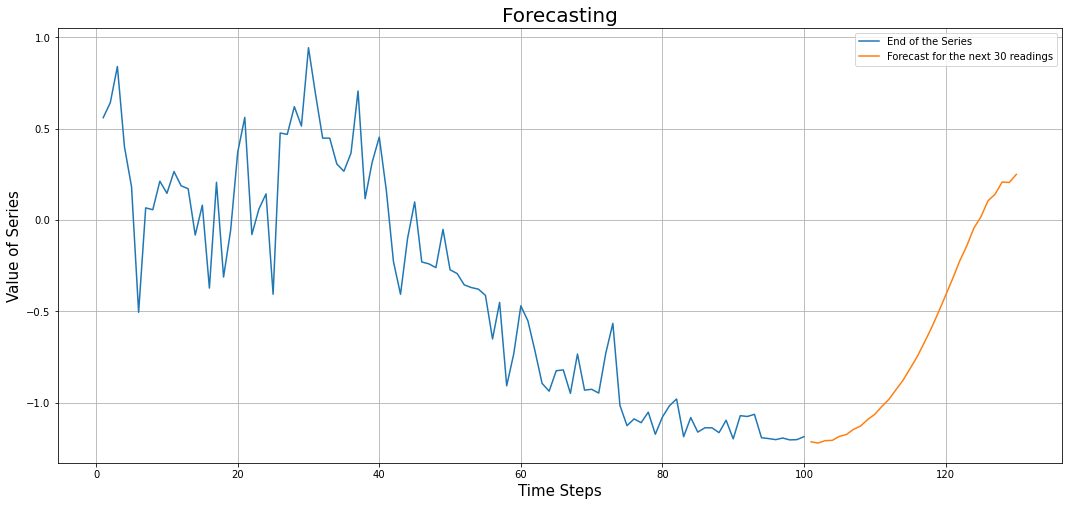

In [87]:
x_1 = np.arange(1,101)
x_2 = np.arange(101,131)
plt.figure(figsize=(18,8))
plt.plot(x_1 , df_scaled[3152:],label='End of the Series')
plt.plot(x_2 , lst_output,label='Forecast for the next 30 readings')
plt.grid()
plt.xlabel('Time Steps',fontsize=15)
plt.ylabel('Value of Series',fontsize=15)
plt.title('Forecasting',fontsize=20)
plt.legend()
plt.savefig('Predictions of next 30 values -1st LSTM model')

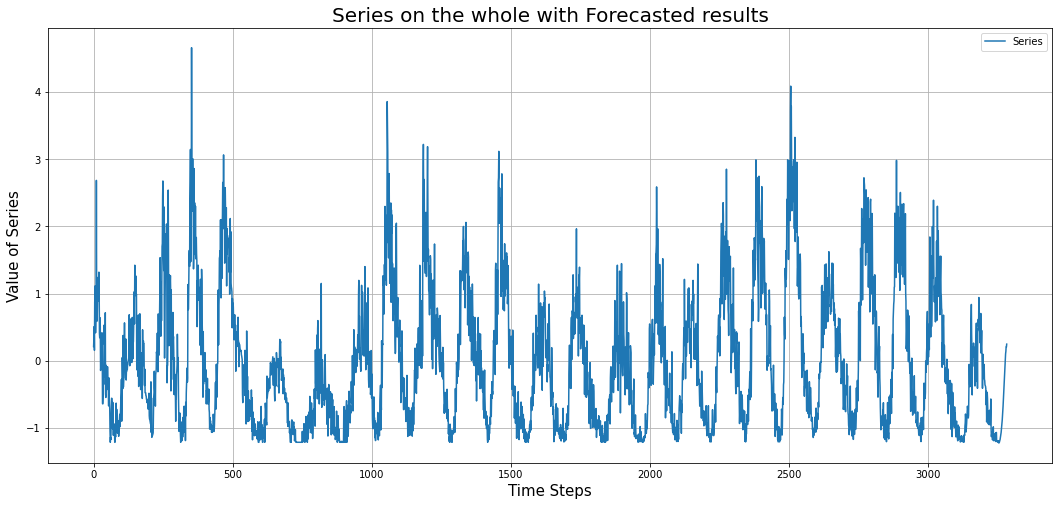

In [88]:
df3 = df_scaled.tolist() + lst_output
np.array(df3).reshape(-1,1)
plt.figure(figsize=(18,8))
plt.plot(df3,label='Series')
plt.grid()
plt.xlabel('Time Steps',fontsize=15)
plt.ylabel('Value of Series',fontsize=15)
plt.title('Series on the whole with Forecasted results',fontsize=20)
plt.legend()
plt.savefig('Prediction + Whole data of 1st LSTM model')

### Creating dataset in a different way:
Now we would like to create a dataset in a bit different manner as in where at each time step where the label has next 10 values and thus in this way we convert the seqeunce to vector to sequence to sequence. In sequence to vector model , there is just one gradient vector at the last time step where as in sequence to sequence there are loss gradients at each and every time step and hence the loss can be divided at each time step. 

In [10]:
#Now I want to create a function which creates the label in such a manner that at each step , it will contain the next 5 values.
def inputs(dataset,time_steps):
    x=[]
    for time in range(len(dataset)-time_steps):
        x.append(dataset[time:time+time_steps,:])
    return np.array(x)

In [11]:
n_steps = 6 #for understanding purpose 
x = inputs(df_default,time_steps=n_steps+2)
y = np.empty((2,6,2))
for ahead in range(1,2+1):
    y[:,:,ahead-1] = x[:,ahead:ahead+n_steps,0]

NameError: name 'df_default' is not defined

In [ ]:
y[1::]

In [12]:
n_steps = 100
series = inputs(df_scaled,time_steps=n_steps+10)
x_train = series[:2600,:n_steps,:]
x_valid = series[2600:2900,:n_steps,:]
x_test = series[2900:,:n_steps,:]

y = np.empty((3142,n_steps,10)) #[4,4,2]
for ahead in range(1,10+1):
    y[: , : , ahead-1] = series[: , ahead:ahead+n_steps ,0]
    
y_train = y[:2600,:,:]
y_valid = y[2600:2900,:,:]
y_test = y[2900:,:,:]

In [13]:
x_train.shape , y_train.shape ,x_valid.shape , y_valid.shape , x_test.shape,y_test.shape

((2600, 100, 1),
 (2600, 100, 10),
 (300, 100, 1),
 (300, 100, 10),
 (242, 100, 1),
 (242, 100, 10))

### LSTM Model:

In [95]:
model = keras.models.Sequential([
    keras.layers.Conv1D(filters=30 , kernel_size=4 , strides=2 , padding='valid' ,input_shape=[None,1]),
    keras.layers.LSTM(30,return_sequences=True),
    keras.layers.LSTM(30,return_sequences=True),
    keras.layers.LSTM(30,return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10)),
])

def last_time_step_mse(y_true,y_pred):
    return keras.metrics.mean_squared_error(y_true[:,-1:],y_pred[:,-1:])


lr_schedule = keras.callbacks.LearningRateScheduler(lambda epoch: 1e-6 * 10**(epoch/10))
model.compile(loss='mse',
             optimizer=keras.optimizers.Adam(lr=1e-6),
             metrics=['mae' , last_time_step_mse])

history = model.fit(x_train,y_train[:,3::2],epochs=100,
                   validation_data=(x_valid,y_valid[:,3::2]),
                   callbacks = [lr_schedule])

Epoch 1/100
82/82 [==============================] - 9s 115ms/step - loss: 1.0089 - mae: 0.8105 - last_time_step_mse: 1.0079 - val_loss: 1.3844 - val_mae: 0.9833 - val_last_time_step_mse: 1.4085
Epoch 2/100
82/82 [==============================] - 8s 92ms/step - loss: 1.0079 - mae: 0.8100 - last_time_step_mse: 1.0068 - val_loss: 1.3830 - val_mae: 0.9827 - val_last_time_step_mse: 1.4068
Epoch 3/100
82/82 [==============================] - 7s 89ms/step - loss: 1.0066 - mae: 0.8094 - last_time_step_mse: 1.0053 - val_loss: 1.3812 - val_mae: 0.9820 - val_last_time_step_mse: 1.4048
Epoch 4/100
82/82 [==============================] - 8s 93ms/step - loss: 1.0050 - mae: 0.8086 - last_time_step_mse: 1.0035 - val_loss: 1.3789 - val_mae: 0.9811 - val_last_time_step_mse: 1.4023m
Epoch 5/100
82/82 [==============================] - 7s 90ms/step - loss: 1.0030 - mae: 0.8077 - last_time_step_mse: 1.0013 - val_loss: 1.3761 - val_mae: 0.9799 - val_last_time_step_mse: 1.3992
Epoch 6/100
82/82 [=========

82/82 [==============================] - 7s 88ms/step - loss: 0.1468 - mae: 0.2790 - last_time_step_mse: 0.1235 - val_loss: 0.2196 - val_mae: 0.3581 - val_last_time_step_mse: 0.1955
Epoch 44/100
82/82 [==============================] - 7s 89ms/step - loss: 0.1374 - mae: 0.2696 - last_time_step_mse: 0.1106 - val_loss: 0.2264 - val_mae: 0.3642 - val_last_time_step_mse: 0.2232
Epoch 45/100
82/82 [==============================] - 7s 89ms/step - loss: 0.1419 - mae: 0.2740 - last_time_step_mse: 0.1139 - val_loss: 0.2314 - val_mae: 0.3692 - val_last_time_step_mse: 0.2215
Epoch 46/100
82/82 [==============================] - 7s 89ms/step - loss: 0.1210 - mae: 0.2529 - last_time_step_mse: 0.0905 - val_loss: 0.2707 - val_mae: 0.3940 - val_last_time_step_mse: 0.2663
Epoch 47/100
82/82 [==============================] - 7s 88ms/step - loss: 0.1266 - mae: 0.2595 - last_time_step_mse: 0.0988 - val_loss: 0.2503 - val_mae: 0.3816 - val_last_time_step_mse: 0.2598
Epoch 48/100
82/82 [==================

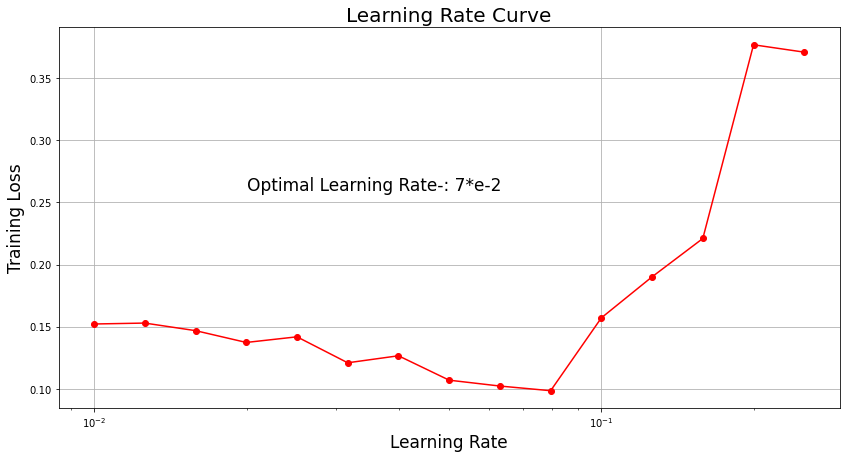

In [110]:
epochs = np.arange(100)
lrs = 1e-6 * 10**(epochs/10)
loss = history.history['loss']
plt.figure(figsize=(14,7))
plt.semilogx(lrs[40:55],loss[40:55],'r-o')
plt.grid()
plt.text(2e-2 , 0.26 ,'Optimal Learning Rate-: 7*e-2',fontsize=17)
plt.title('Learning Rate Curve',fontsize=20)
plt.xlabel('Learning Rate',fontsize=17)
plt.ylabel('Training Loss',fontsize=17)
plt.savefig('LR Curve of 2nd LSTM Model')
#So after looking closely at various epochs , we can certainly say that the optimal learning rate is 3 * 1e-4

In [111]:
model = keras.models.Sequential([
    keras.layers.Conv1D(filters=30 , kernel_size=4 , strides=2 , padding='valid' ,input_shape=[None,1]),
    keras.layers.LSTM(30,return_sequences=True),
    keras.layers.LSTM(30,return_sequences=True),
    keras.layers.LSTM(30,return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10)),
])

def last_time_step_mse(y_true,y_pred):
    return keras.metrics.mean_squared_error(y_true[:,-1:],y_pred[:,-1:])

model.compile(loss='mse',
             optimizer=keras.optimizers.Adam(lr=7e-2),
             metrics=['mae',last_time_step_mse])

history = model.fit(x_train,y_train[:,3::2],epochs=100,
                   validation_data=(x_valid,y_valid[:,3::2]))

Epoch 1/100
82/82 [==============================] - 10s 119ms/step - loss: 0.3388 - mae: 0.4187 - last_time_step_mse: 0.3426 - val_loss: 0.2196 - val_mae: 0.3631 - val_last_time_step_mse: 0.1971
Epoch 2/100
82/82 [==============================] - 8s 94ms/step - loss: 0.1913 - mae: 0.3182 - last_time_step_mse: 0.1773 - val_loss: 0.2183 - val_mae: 0.3578 - val_last_time_step_mse: 0.1846
Epoch 3/100
82/82 [==============================] - 8s 93ms/step - loss: 0.1775 - mae: 0.3065 - last_time_step_mse: 0.1623 - val_loss: 0.2243 - val_mae: 0.3624 - val_last_time_step_mse: 0.1928
Epoch 4/100
82/82 [==============================] - 7s 90ms/step - loss: 0.1653 - mae: 0.2954 - last_time_step_mse: 0.1488 - val_loss: 0.2437 - val_mae: 0.3706 - val_last_time_step_mse: 0.2122
Epoch 5/100
82/82 [==============================] - 7s 91ms/step - loss: 0.1573 - mae: 0.2882 - last_time_step_mse: 0.1366 - val_loss: 0.2257 - val_mae: 0.3613 - val_last_time_step_mse: 0.2099ss: 0.1586 - mae: 0 - ETA: 0s

Epoch 84/100
82/82 [==============================] - 8s 93ms/step - loss: 0.1816 - mae: 0.3134 - last_time_step_mse: 0.1599 - val_loss: 0.2537 - val_mae: 0.3864 - val_last_time_step_mse: 0.2358
Epoch 85/100
82/82 [==============================] - 8s 93ms/step - loss: 0.1770 - mae: 0.3091 - last_time_step_mse: 0.1498 - val_loss: 0.2676 - val_mae: 0.3908 - val_last_time_step_mse: 0.2480A: 0s - loss: 0.1761 - mae: 0.3081 - last_t
Epoch 86/100
82/82 [==============================] - 8s 93ms/step - loss: 0.1738 - mae: 0.3063 - last_time_step_mse: 0.1498 - val_loss: 0.2562 - val_mae: 0.3820 - val_last_time_step_mse: 0.2069
Epoch 87/100
82/82 [==============================] - 8s 96ms/step - loss: 0.2000 - mae: 0.3255 - last_time_step_mse: 0.1688 - val_loss: 0.3145 - val_mae: 0.4109 - val_last_time_step_mse: 0.2731
Epoch 88/100
82/82 [==============================] - 8s 93ms/step - loss: 0.2016 - mae: 0.3281 - last_time_step_mse: 0.1734 - val_loss: 0.2803 - val_mae: 0.3949 - val_last_time

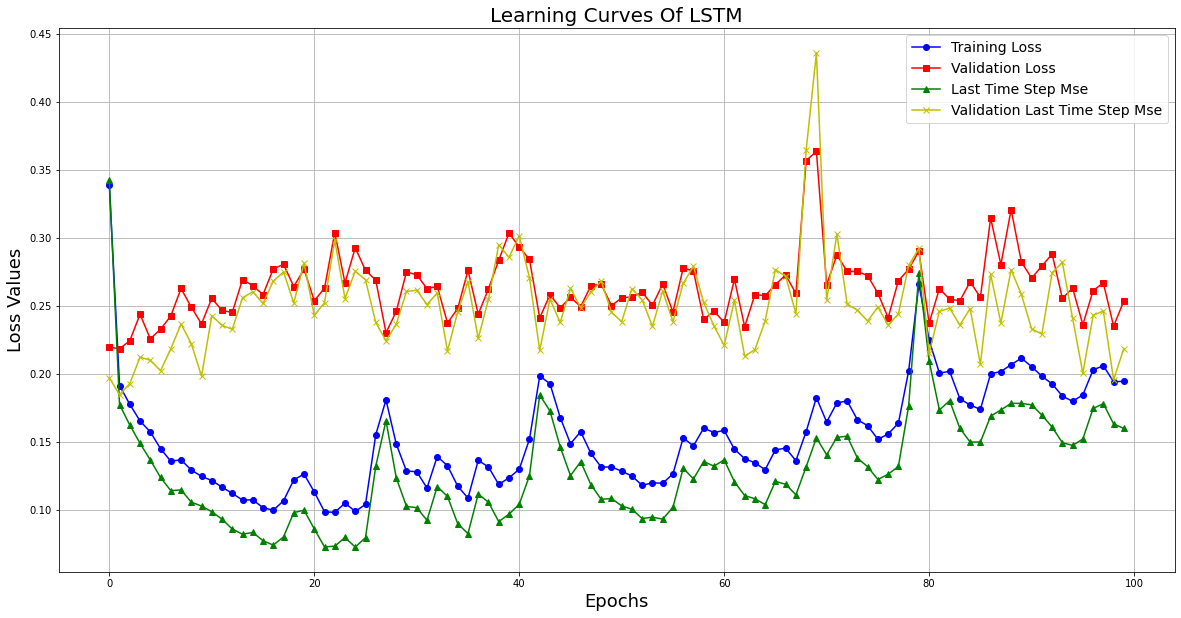

In [115]:
loss = history.history['loss']
val_loss = history.history['val_loss']
last_time_step_mse = history.history['last_time_step_mse']
val_last_time_step_mse = history.history['val_last_time_step_mse']
epochs = np.arange(100)
plt.figure(figsize=(20,10))
plt.plot(epochs,loss,'b-o',label='Training Loss')
plt.plot(epochs , val_loss , 'r-s' ,label='Validation Loss')
plt.plot(epochs , last_time_step_mse , 'g-^' , label='Last Time Step Mse')
plt.plot(epochs , val_last_time_step_mse , 'y',marker='x' , label='Validation Last Time Step Mse')
plt.legend(fontsize=14)
plt.grid()
plt.title('Learning Curves Of LSTM',fontsize=20)
plt.xlabel('Epochs',fontsize=18)
plt.ylabel('Loss Values',fontsize=18)
plt.savefig('Learning Curves of 2nd LSTM MODEL')

In [113]:
y_train.shape , y_train[:,3::2,].shape

((2600, 100, 10), (2600, 49, 10))

In [114]:
model.evaluate(x_test,y_test[:,3::2])

8/8 [==============================] - 0s 25ms/step - loss: 0.1911 - mae: 0.3229 - last_time_step_mse: 0.1832


[0.19114869832992554, 0.32291463017463684, 0.1832430362701416]

#### Observation:
So here the loss is pretty high if we compare our model with that of the previous LSTM model where the labels were distributed in a different manner. Since it is a more difficult task thus there is no room for comparing this model with the previos one because previously the the labels were there with respect to the last time step only and hence there was only one loss gradient vector which predicted just 1 value. But here in this case there are labels just at each time step which contain the next 10 values and thus here the loss gradient is at each of the time step and the last time step is producing 10 values.

In [124]:
y_test_pred = model.predict(x_test)
y_test = y_test[:,3::2]
y_test.shape

(242, 49, 10)

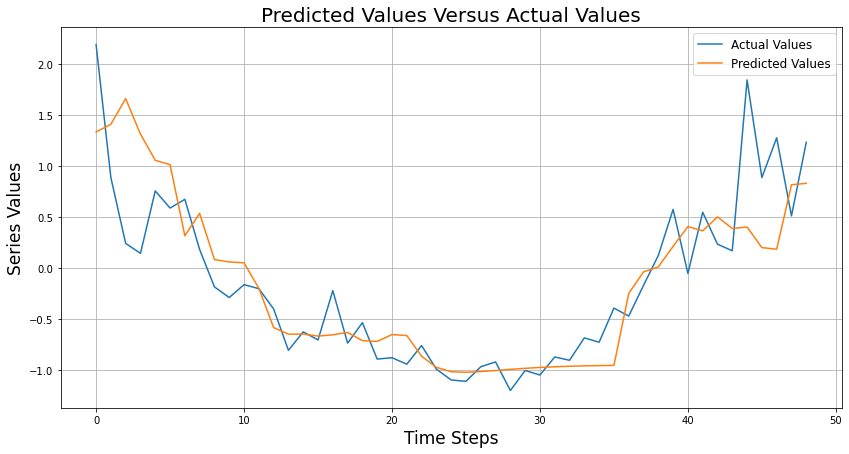

In [125]:
epochs = np.arange(49)
plt.figure(figsize=(14,7))
plt.plot(epochs,y_test[9,:,4] , label='Actual Values')
plt.plot(epochs,y_test_pred[9,:,4] , label='Predicted Values')
plt.grid()
plt.title('Predicted Values Versus Actual Values',fontsize=20)
plt.xlabel('Time Steps',fontsize=17)
plt.ylabel('Series Values',fontsize=17)
plt.legend(fontsize=12)
plt.savefig('Performance of LSTM 2ND MODEL ON TEST DATA')

In [126]:
def plot_multiple_forecasts(x,y,y_pred):
    n_steps = x.shape[1]
    ahead = y.shape[1]
    plt.figure(figsize=(14,7))
    plt.plot(x[1,:,0] , 'y-o')
    plt.plot(np.arange(n_steps , n_steps + ahead), y[1,:,1] ,'r-^' , label='Actual Series')
    plt.plot(np.arange(n_steps , n_steps + ahead) , y_pred[1,:,1] ,'b-x' , label='Forecasted Series')
    plt.grid()
    plt.legend(fontsize=15)

Text(0, 0.5, 'Series Values')

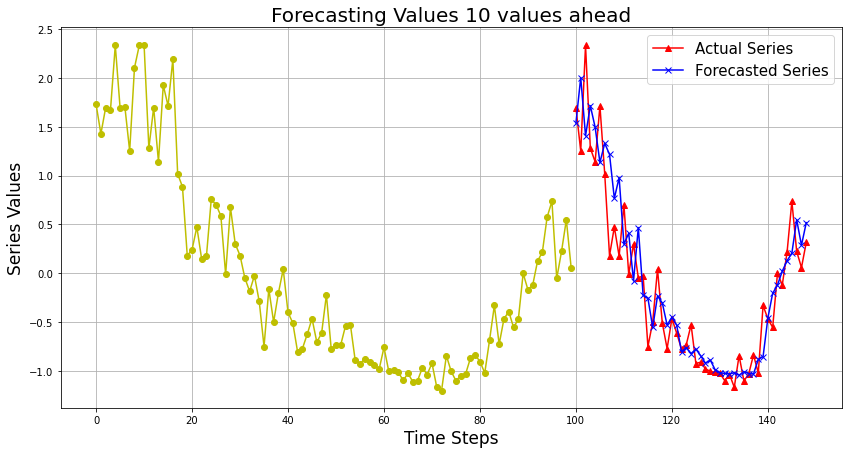

In [113]:
plot_multiple_forecasts(x_test,y_test,y_test_pred)
plt.title('Forecasting Values 10 values ahead',fontsize=20)
plt.xlabel('Time Steps',fontsize=17)
plt.ylabel('Series Values',fontsize=17)
plt.savefig('Prediction of ne')

### Thank you: